### 3d. Parametric surface, partial derivatives, normal to the surface, TP-equation


**Implicit form of surface equation, gradient, unit normal, tangent plane equation.  
(SymPy, NumPy, plotting with Matplotlib)**

**Problem.** Find an equation for the tangent plane to the surface $x^2 + y^2 + z = 0$ at the
point where x = -1 and y = -1 . ~[Sch49/26]

Here we are using gradient to find normal to the surface and Sympy Plane() method to find the
tangent plane equation. 


In [1]:
# INIT
import numpy as np
from sympy import *
from sympy.vector import CoordSys3D, gradient, Del
from sympy import Point3D, Plane
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

x, y, z, f = symbols('x y z f')         # Coordinate variables
C = CoordSys3D('C')                     # Defines a standard coordinate system
#r = x*C.i + y*C.j + z*C.k              # Position vector


In [2]:
# INPUT
f = C.x**2 + C.y**2 + C.z               # Function of a surface (implicit form)
eqn_s = Eq(x**2 + y**2 + z, 0)
x0 = -1                                 # Selected x and y coordinates for a fixed ..
y0 = -1                                 #  point on the surface.


In [3]:
# CALCULATE

# Fixed point P0  on the surface  
#(x0 and y0 are given in the input, but z0 must be calculated)
z1 = solve(eqn_s, z)                    # z solved from the surface equation to z1(-> list)
z1 = z1[0]                              # z1 is an expression for the z-value of the surface point
z0 = z1.evalf(subs = {x: x0, y: y0 })   # The z0-value is obtained by evaluating z1 at x0, y0
P0 = [x0, y0, z0]                       # Fixed point on the surface

# Unit normal vector at point P0
grad = gradient(f)                        # Gradient vector is perpendicular to the surface f.         
norm_grad = sqrt(grad.dot(grad))          # Norm is the square root of the dot product ..
                                          # of vector with itself.
grad_P0 = grad.evalf(subs = {C.x: P0[0], C.y: P0[1], C.z: P0[2]})    # Gradient at point P0
norm_grad_P0 = sqrt(grad_P0.dot(grad_P0)) # Norm of gradient vector at point P0
N0 = grad_P0/norm_grad_P0                 # Unit normal vector at point P0 is grad_P0/|grad_P0|
# Extract scalar components from N0 
P1 = C.origin.locate_new('P1', N0)
N0c = list(P1.express_coordinates(C))     # List of scalar components of normal vector N0 

# Tangent plane equation using SymPy Plane() function 
pl1 = Plane(Point3D(x0, y0, z0), normal_vector = (N0c[0], N0c[1], N0c[2] ))
pl1 = pl1.equation()          # Tangent plane equation


# Test printing
print('Expression for the z-value:  ', z1)
print('Fixed point on the surface:  ', P0)
print(P0[1])
print('Gradient:   grad = ', grad)
print('norm_grad =', norm_grad)
print('Gradient at P0:   grad_P0 =',grad_P0)
print('norm_grad_P0 =',   norm_grad_P0)
print('Unit normal at P0:  N0 =', N0)
print('Unit normal component list:', N0c)
print('Tangent plane equation:', pl1, '= 0')          
pl1  #deactivate next command Eq(pl1)                     # Tangent plane function
Eq(pl1, 0)                                                # Tangent plane equation

Expression for the z-value:   -x**2 - y**2
Fixed point on the surface:   [-1, -1, -2.00000000000000]
-1
Gradient:   grad =  2*C.x*C.i + 2*C.y*C.j + C.k
norm_grad = sqrt(4*C.x**2 + 4*C.y**2 + 1)
Gradient at P0:   grad_P0 = (-2.0)*C.i + (-2.0)*C.j + 1.0*C.k
norm_grad_P0 = 3.00000000000000
Unit normal at P0:  N0 = (-0.666666666666667)*C.i + (-0.666666666666667)*C.j + 0.333333333333333*C.k
Unit normal component list: [-0.666666666666667, -0.666666666666667, 0.333333333333333]
Tangent plane equation: -2*x/3 - 2*y/3 + z/3 - 2/3 = 0


Eq(-2*x/3 - 2*y/3 + z/3 - 2/3, 0)

In [4]:
z3 = solve(-2*x/3 - 2*y/3 + z/3 - 2/3, z)   # z solved from the plane equation to z3 (-> list)
print('z-values for the plane: z = ', z3[0],)

# !!! This does not work ???
#z3 = solve(pl1, z)                         # !!! This does not work ???
#z3 = solve(Eq(pl1), z)                     # !!! This does not work ???
#print(z3)                                  # No solution ???                            

z-values for the plane: z =  2.0*x + 2.0*y + 2.0


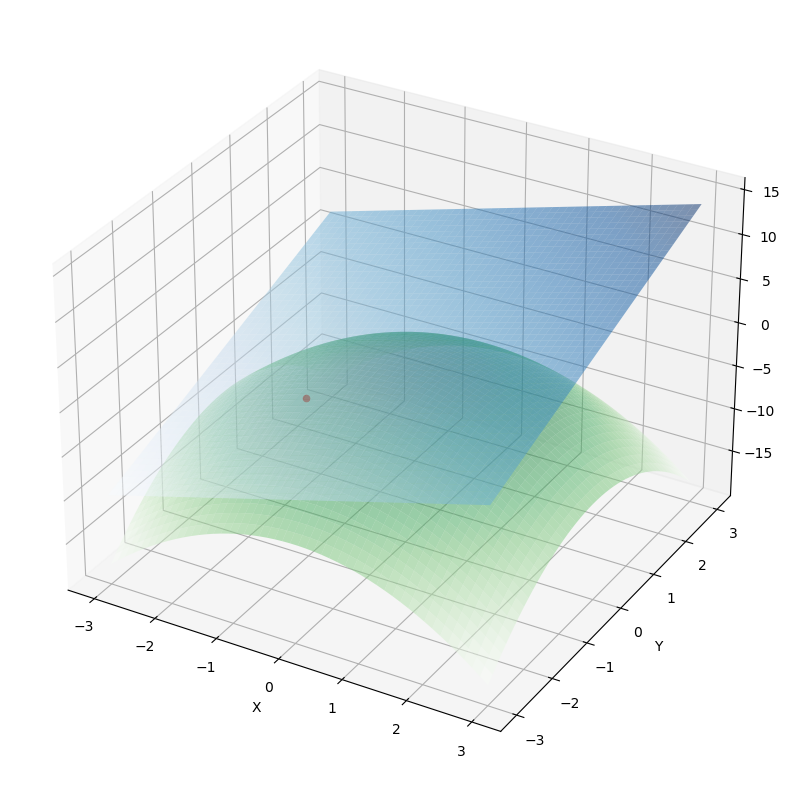

In [5]:
# PLOTTING
# Input
z2 = lambda x2, y2: (-x2**2 - y2**2)  # z values for the surface
z3 = lambda x2, y2: (2*x2 +2*y2 +2)   # z values for the plane

# Initiate
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection = '3d')   # Draws the coordinate system

# Axis markings
ax.set_xlabel('X')                 
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Calculate
x1 = np.linspace(-3, 3)            # The set of values for x
y1 = np.linspace(-3, 3)
[x2, y2] = np.meshgrid(x1, y1)     # (x,y) lattice points

# Plot
ax.plot_surface(x2, y2, z2(x2, y2),  alpha=0.5, cmap = 'Greens')    # Surface  z2 = z2(x2, y2)
ax.plot_surface(x2, y2, z3(x2, y2), alpha=0.5, cmap = 'Blues')      # Plane    z3 = z3(x2, y2)
ax.scatter(-1, -1, -2, linewidths=1, c ='r', label = P0)            # Tangent point
plt.show()